# The Promotion Effect


This notebook aims to analyse the change in underlying performance metrics that a team faces when getting promoted from the Championship to the Premier League. The measures we will be looking at will expected goals for and against for each promoted team in the Championship, and then the percentage change of these metrics after a year in the Premier League. We will not be considering league position or survival/relegation.

The intuition would be that teams would face a large decrease in expected goals output and a large increase in the expected goals conceded. This notebook will look to see if it can confirm or deny those assumptions.

## Exploratory Data Analysis

The data is sourced from https://fbref.com & https://footystats.org/ and captures the xG and xGA per game as well as the total xG produced in the league for each team promoted into the Premier league going back between 2016/17 - 2022/23.

In [11]:
import pandas as pd

df = pd.read_csv("data/promotion-data.csv")

df.drop(columns=['Year of Promotion']).describe().style.format("{:.2f}")

As we only have these limited years going back for xG data, it means that our number of observations is limited to 21 - this lack of data means that it is difficult to obtain any meaningful conclusions.

From the table of summary statistics above, we can see that teams on average produce 1.6 xG in their promotion year in the Championship before then producing an average of 1.08 xG in the Premier League. An average of 0.52 less expected goals.

When looking at expected goals allowed, a similar pattern is identified: teams allow 1.08 in the Championship and then allow 1.62 when in the Premier League.

This basic look at summary statistics already begins to confrim the basic intuition that teams perform worse when entering the Premier League.

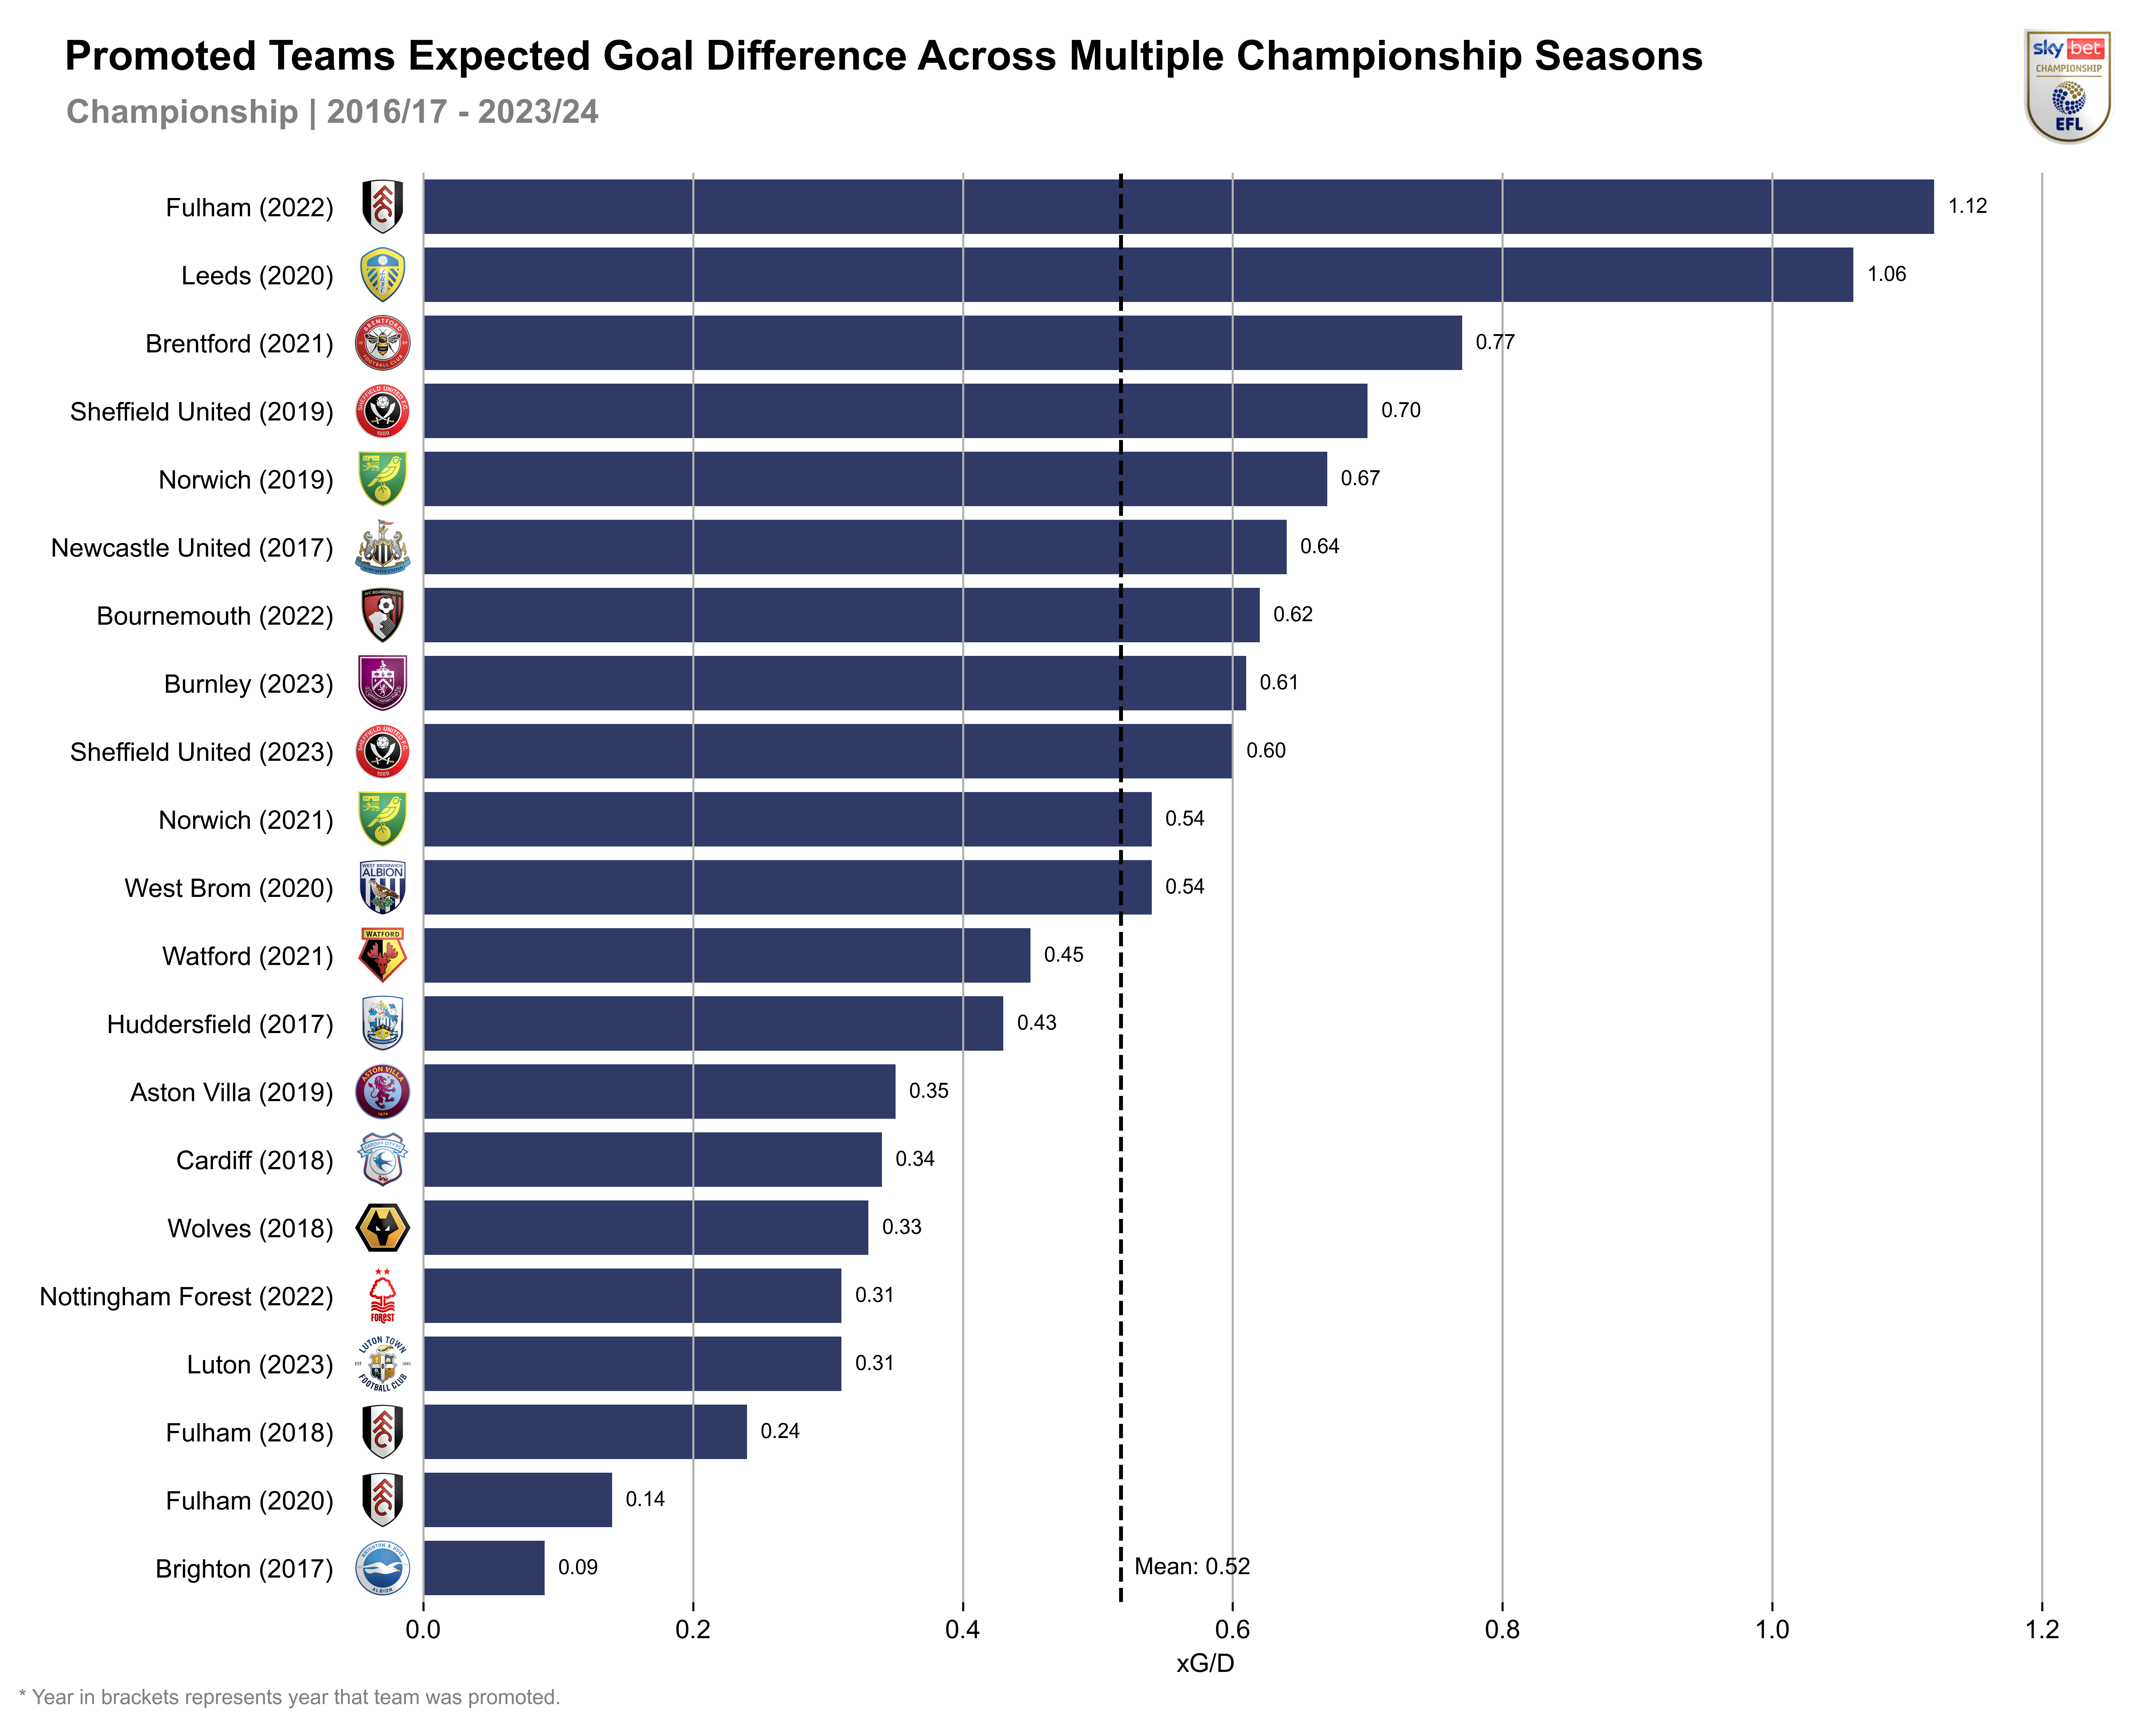

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df["Team-Year"] = df["Team"] + " (" + df["Year of Promotion"].astype(str) + ")"

# Sorting the dataframe by championship xGD so that the best performing teams are at the top
df_champ_xgd_sorted = df.sort_values(by="CHA xGD", ascending=False).reset_index()
# Calculating the xGD mean of the championship performances
mean_champ_xgd = df["CHA xGD"].mean()

logo_dict = {
    "Aston Villa": r"images\603.png",
    "Bournemouth": r"images\600.png",
    "Brentford": r"images\617.png",
    "Brighton": r"images\618.png",
    "Burnley": r"images\622.png",
    "Cardiff": r"images\625.png",
    "Nottingham Forest": r"images\692.png",
    "Fulham": r"images\654.png",
    "Huddersfield": r"images\664.png",
    "Leeds": r"images\671.png",
    "Luton": r"images\677.png",
    "Newcastle United": r"images\688.png",
    "Norwich": r"images\691.png",
    "Sheffield United": r"images\708.png",
    "Watford": r"images\732.png",
    "West Brom": r"images\734.png",
    "Wolves": r"images\740.png"
}

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)

# Adjusting x axis to allow for logo placement
plt.xlim(min(df_champ_xgd_sorted["CHA xGD"]) - 0.15, max(df_champ_xgd_sorted["CHA xGD"]) + 0.1)

# Creating seaborn barplot with championship colour
ax = sns.barplot(y="Team-Year", x="CHA xGD", data=df_champ_xgd_sorted, color="#283270")

# For loop that goes through dataframe, places logo to the left of the y axis, and adds a text label showing xGD to the right of each bar.
for i, team_year in enumerate(df_champ_xgd_sorted['Team-Year']):
    team = team_year.split(" (")[0]

    y_val = i  
    x_val = df_champ_xgd_sorted.loc[i, "CHA xGD"]
    
    logo_path = logo_dict[team]
    
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12) 
    
    ab = AnnotationBbox(logo_image, (min(df_champ_xgd_sorted["CHA xGD"]) - 0.12, y_val), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

    plt.text(x_val + 0.01, y_val+0.01, f"{x_val:.2f}", va="center", ha="left", 
             fontdict={"fontsize": 8, "color": "black"})


# Creates an average line on the graph with a label showing it.
plt.axvline(mean_champ_xgd, color="black", linestyle="--", linewidth=1.5)
plt.text(mean_champ_xgd + 0.01, len(df_champ_xgd_sorted) - 1, "Mean: {:.2f}".format(mean_champ_xgd), 
         color="black", va="center", fontdict={"fontsize": 9})

# Turns of y axis label and the y ticks
plt.ylabel("")
ax.tick_params(axis="y", which="both", length=0)
plt.xlabel("xG/D")

# Adds title and subtitle
plt.title("Promoted Teams Expected Goal Difference Across Multiple Championship Seasons", fontdict={"fontweight":"bold", "fontsize":16}, pad=40, loc="left", x=-0.161)
plt.suptitle("Championship | 2016/17 - 2023/24", y=0.92, ha="left", x=0.001, fontsize=13, weight="bold", color="grey")

# Adds Championship logo to top right
champ_logo = OffsetImage(plt.imread(r"images/12.png"), zoom=0.25)
ab = AnnotationBbox(champ_logo, xy=(1, 1.06), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

# Removes axis lines
sns.despine(left=True, bottom=True)
plt.grid(True, axis='x')

# Adds little footer text
plt.text(-0.3, 22, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})

plt.show()

The graph above shows that Leeds (2020) and Fulham (2022) were the two standout teams over the time period for strong performances in the Championship with xG/D values of 1.06 and 1.12 respectively.

Meanwhile, Brighton (2017) is the worst performer, getting promoted with a mere 0.09 xG/D, which is ironic as you could argue they are now the most established team within the Premier League out of this group, bar Newcastle.

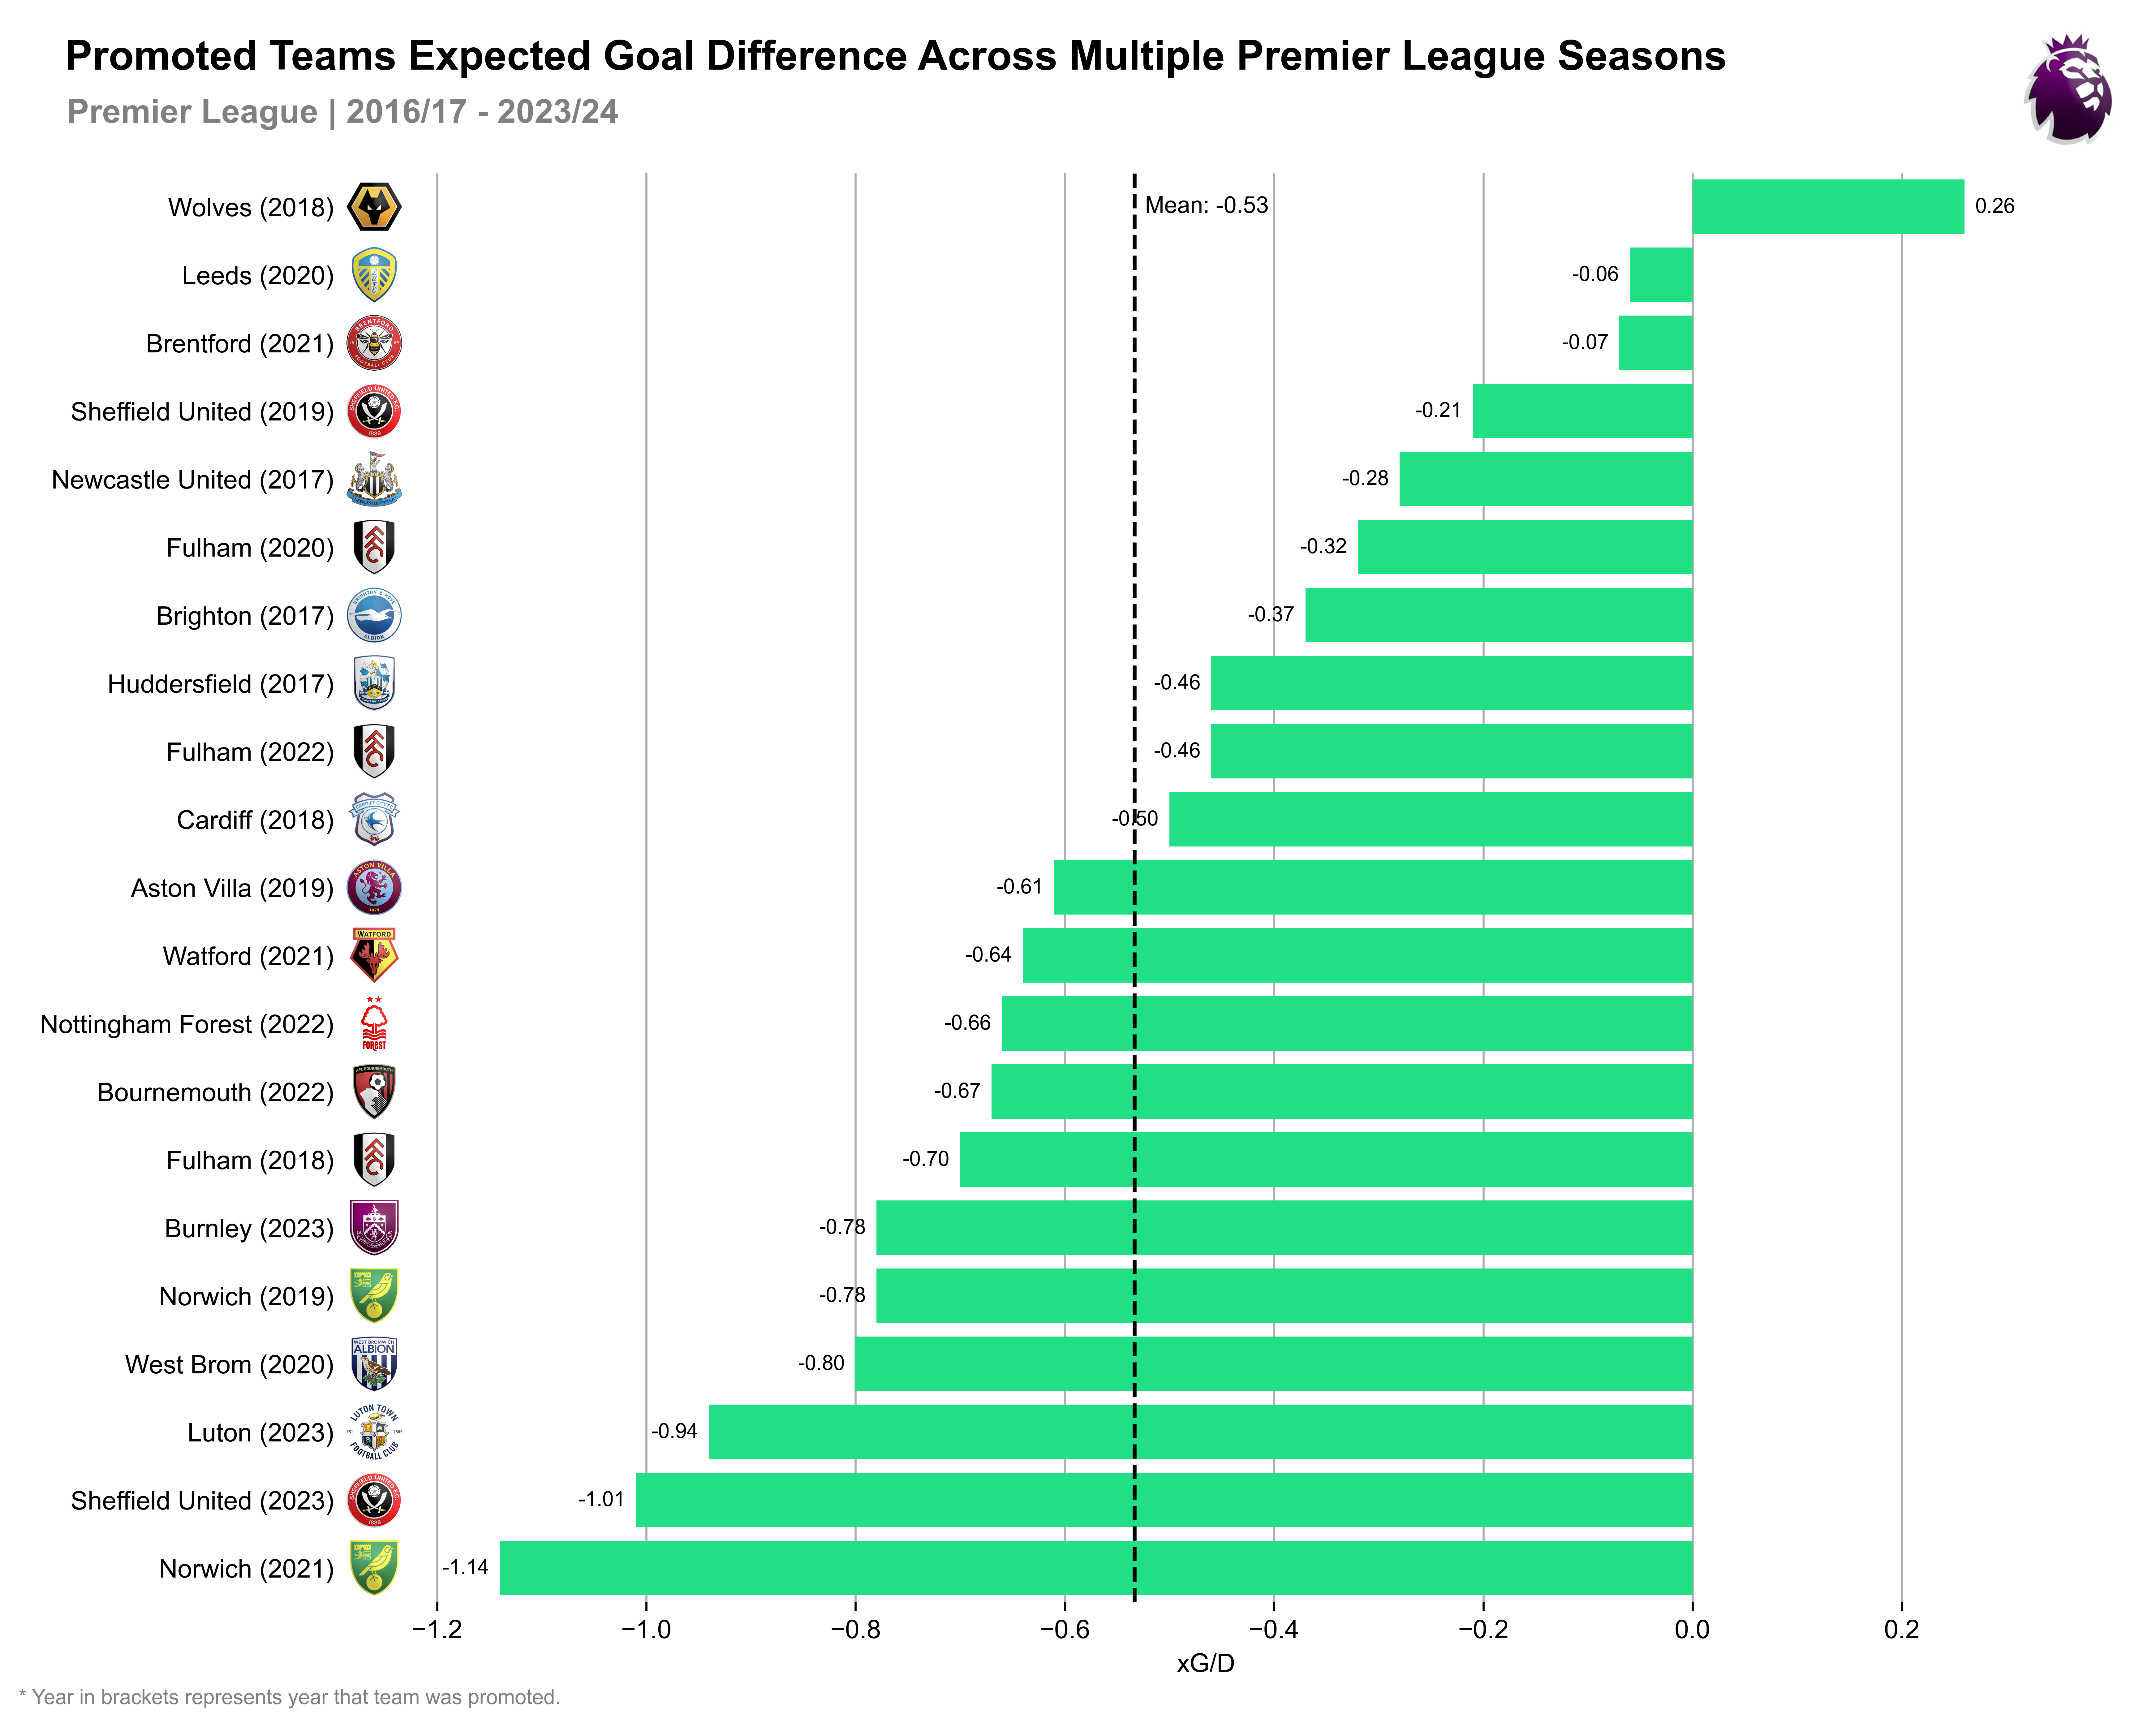

In [21]:
df_prem_xgd_sorted = df.sort_values(by="PRE xGD", ascending=False).reset_index()
mean_prem_xgd = df["PRE xGD"].mean()

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)

plt.xlim(min(df_prem_xgd_sorted["PRE xGD"]) - 0.15, max(df_prem_xgd_sorted["PRE xGD"]) + 0.1)

ax = sns.barplot(y="Team-Year", x="PRE xGD", data=df_prem_xgd_sorted, color="#00ff85")

for i, team_year in enumerate(df_prem_xgd_sorted['Team-Year']):
    team = team_year.split(" (")[0]

    y_val = i  
    x_val = df_prem_xgd_sorted.loc[i, "PRE xGD"]
    
    logo_path = logo_dict[team]
    
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12) 
    
    ab = AnnotationBbox(logo_image, (min(df_prem_xgd_sorted["PRE xGD"]) - 0.12, y_val), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

    # Adjust text label placement for negative values
    plt.text(x_val + 0.01 if x_val >= 0 else x_val - 0.01, y_val+0.01, f"{x_val:.2f}", va="center", ha="left" if x_val >= 0 else "right", 
             fontdict={"fontsize": 8, "color": "black"})

plt.axvline(mean_prem_xgd, color="black", linestyle="--", linewidth=1.5)
plt.text(mean_prem_xgd + 0.01, 0, "Mean: {:.2f}".format(mean_prem_xgd), 
         color="black", va="center", fontdict={"fontsize": 9})

plt.ylabel("")
ax.tick_params(axis="y", which="both", length=0)
plt.xlabel("xG/D")

plt.title("Promoted Teams Expected Goal Difference Across Multiple Premier League Seasons", fontdict={"fontweight":"bold", "fontsize":16}, pad=40, loc="left", x=-0.161)
plt.suptitle("Premier League | 2016/17 - 2023/24", y=0.92, ha="left", x=0.001, fontsize=13, weight="bold", color="grey")

prem_logo = OffsetImage(plt.imread(r"images/11.png"), zoom=0.25)
ab = AnnotationBbox(prem_logo, xy=(1, 1.06), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

sns.despine(left=True, bottom=True)
plt.gca().set_axisbelow(True)
plt.grid(True, axis='x')

plt.text(-1.6, 22, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})


plt.show()


Wolves in 2018 are the clear standout here, the only promoted team that managed to generate a positive expected goal difference in the Premier League which is quite an achievement, reflected by their top half finish. Interestingly, many promoted teams managed to get top half finishes in the earlier years on the sample but none managed to come close to Wolves' performances.

Norwich (2021) and Sheffield Utd (2023) are the only teams with less than a -1 xG/D, these teams struggled a lot when getting to the promised land, and interestingly, neither team got there via the playoffs - which you may expect to indicate a weaker team.

In [26]:
total_prem_games = 380
total_champ_games = 552


# Create averages for total league xG by team in each game
df["average_xg_per_game_champ"] = (df["CHA Total xG"] / total_champ_games) / 2 #divide by 2 to account for that 2 teams play each game so xG is shared between both
df["average_xg_per_game_prem"] = (df["PRE Total xG"] / total_prem_games) / 2

# Normalises each team's xG and xGA accoriding to average xG in the league
df["normalised_xg_per_game_champ"] = df["CHA xG"] / df["average_xg_per_game_champ"]
df["normalised_xga_per_game_champ"] = df["CHA xGA"] / df["average_xg_per_game_champ"]

# Does same for Premier League
df["normalised_xg_per_game_prem"] = df["PRE xG"] / df["average_xg_per_game_prem"]
df["normalised_xga_per_game_prem"] = df["PRE xGA"] / df["average_xg_per_game_prem"]

# Creates % difference moving from Championship to Premier League
df["normalised_xg_diff"] = (df["normalised_xg_per_game_prem"] - df["normalised_xg_per_game_champ"]) / df["normalised_xg_per_game_champ"]
df["normalised_xga_diff"] = (df["normalised_xga_per_game_prem"] - df["normalised_xga_per_game_champ"]) / df["normalised_xga_per_game_champ"]

# Printing out the average effects
average_xg_change = df["normalised_xg_diff"].mean() * 100
average_xga_change = df["normalised_xga_diff"].mean() * 100

print(f"Average Normalised Change in xG: {average_xg_change:.2f}%")
print(f"Average Normalised Change in xGA: {average_xga_change:.2f}%")

Average Normalised Change in xG: -33.49%
Average Normalised Change in xGA: 46.48%


The average promotion effect appears to be a ~33% reduction in xG output, and a ~46% increase in xGA.

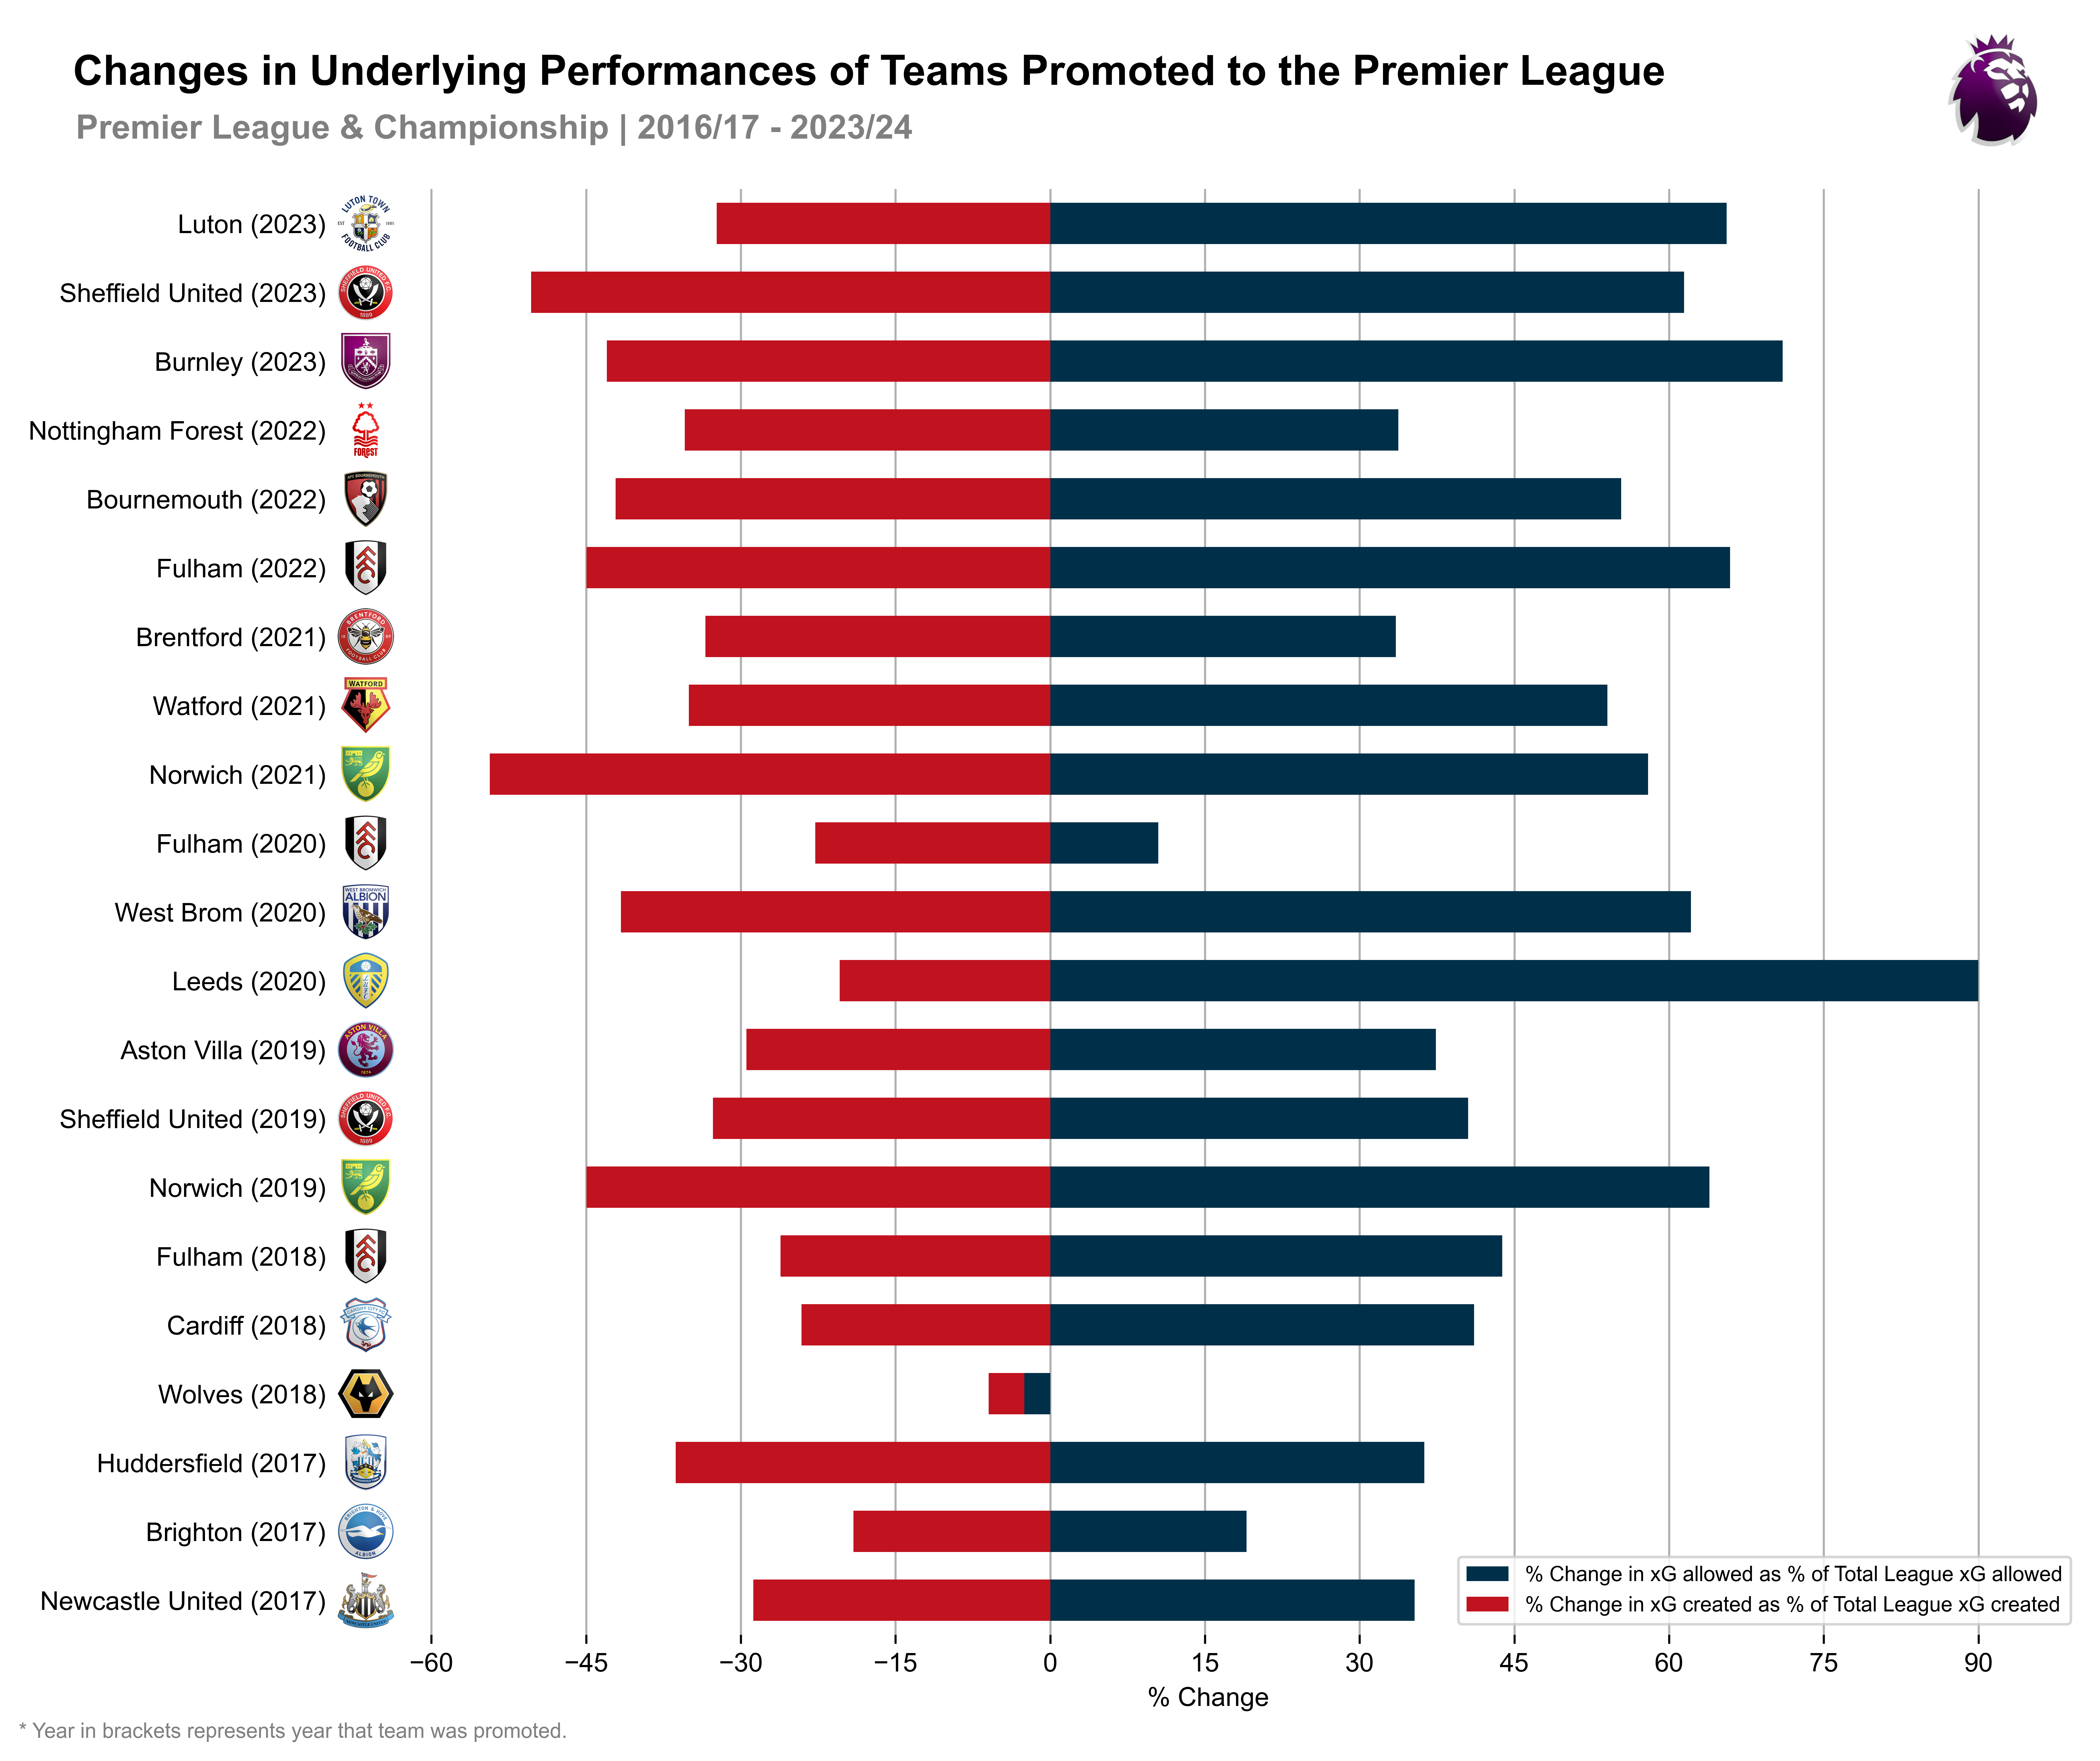

In [27]:
from matplotlib.ticker import MaxNLocator
import numpy as np

categories = df["Team-Year"]
values1 = df["normalised_xg_diff"] * 100
values2 = df["normalised_xga_diff"] * 100

y_pos = np.arange(len(categories))
bar_width = 0.6

plt.rcParams.update({
    'font.family': 'arial'
})

plt.figure(figsize=(12, 10), dpi=600)

ax = plt.gca()

# Using a for loop to draw the bars onto the graph to allow for bar placement to be dependent on whichever is the higher value to prevent overlapping.
for i, (val1, val2) in enumerate(zip(values1, values2)):
    if abs(val1) < abs(val2):
        # If val1 is lower, draw it on top
        ax.barh(y_pos[i], val2, height=bar_width, color="#003049", zorder=2, label=r"% Change in xG allowed as % of Total League xG allowed" if i == 0 else "")
        ax.barh(y_pos[i], val1, height=bar_width, color="#c1121f", zorder=3, label=r"% Change in xG created as % of Total League xG created" if i == 0 else "")
    else:
        # If val2 is lower, draw it on top
        ax.barh(y_pos[i], val1, height=bar_width, color="#c1121f", zorder=2, label=r"% Change in xG created as % of Total League xG created" if i == 0 else "")
        ax.barh(y_pos[i], val2, height=bar_width, color="#003049", zorder=3, label=r"% Change in xG allowed as % of Total League xG allowed" if i == 0 else "")

# Adjusting x and y limit for logo and visual appeal
plt.xlim(min(values1) - 15, max(values2) + 10)
plt.ylim(-0.5, len(categories) - 0.5)

# Labels y axis and removes the tick marks and also add title and subtitle
plt.yticks(y_pos, categories)
ax.tick_params(axis='y', which='both', length=0)
plt.xlabel('% Change')
plt.title("Changes in Underlying Performances of Teams Promoted to the Premier League", fontdict={"fontweight": "bold", "fontsize": 16}, pad=40, loc="left", x=-0.15)
plt.suptitle("Premier League & Championship | 2016/17 - 2023/24", y=0.92, ha="left", x=0.01, fontsize=13, weight="bold", color="grey")

# Adding team logos next to each bar
for i, team_year in enumerate(categories):
    team = team_year.split(" (")[0]
    
    # Adding logos
    logo_path = logo_dict[team]
    logo_image = OffsetImage(plt.imread(logo_path), zoom=0.12)
    
    ab = AnnotationBbox(logo_image, (min(values1) - 12, i), frameon=False, box_alignment=(0.5, 0.5))  
    ax.add_artist(ab)

# Adding the legend
plt.legend(loc='best', frameon=True, fontsize=8)

# Adjust the appearance
sns.despine(left=True, bottom=True)
plt.gca().set_axisbelow(True)
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
plt.grid(True, axis='x', which="major")

# Add premier league logo
prem_logo = OffsetImage(plt.imread(r"images/11.png"), zoom=0.25)
ab = AnnotationBbox(prem_logo, xy=(0.95, 1.07), xycoords="axes fraction", frameon=False, box_alignment=(0.5, 0.5))
ax.add_artist(ab)

# Footer text
plt.text(-100, -2, "* Year in brackets represents year that team was promoted.",
         color="grey", fontdict={"fontsize": 8})

# Displaying the plot
plt.show()


This graph highlights the change in attacking and defensive performance, also considering the xG environment of the leagues that the teams were in.

This graph reinforces Wolves' 2018 achievement, they are the only team that had a reduction in xGA allowed when getting promoted, and show a drastic difference in the level of reduction in xG output when compared to other teams.

Leeds (2020) also look like an outlier, with a large (almost 90%!) increase in xG allowed, suggesting that their defence took a relative battering when coming up against Premier League teams when compared to Championship squads.

## Conclusion

Overall, this notebook has produced analysis that appears to confirm the intuition that promoted teams, on average, take a dramatic hit to their performances.